# Reducción de la dimensionalidad - Caso de uso

## Realizado por: Pablo Sánchez Cabrera

Se lleva a cabo un proceso proceso común a ambos ejercicios (limpieza de datos y análisis de las variables) así como el estudio de la utilidad del uso de este tipo técnicas en el dataset de Boston Housing.

Se cargan las librerías

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

Se cargan los datos

In [42]:
data = pd.read_csv("../data/HousingData.csv")
data = data.dropna() # se eliminan valores nulos existenten en el dataset

Se excluyen las variables `chas` y `rad` al ser variables categóricas. Asimismo, el target `medv` también será excluido

In [43]:
cat=["CHAS", "RAD"]
data_cat = data[cat]
data=data.drop(cat, axis=1)

y = data["MEDV"] # target
data = data.drop(columns="MEDV")

data.describe() #summary de los datos

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.553215,6.280015,68.932741,3.805268,406.431472,18.537563,358.490939,12.769112
std,9.202423,23.954082,6.908364,0.113112,0.697985,27.888705,2.098571,168.312419,2.166460,89.283295,7.308430
min,0.006320,0.000000,0.460000,0.389000,3.561000,2.900000,1.129600,187.000000,12.600000,2.600000,1.730000
25%,0.081955,0.000000,5.130000,0.453000,5.879250,45.475000,2.110100,280.250000,17.400000,376.707500,7.125000
50%,0.268880,0.000000,8.560000,0.538000,6.201500,77.700000,3.199200,330.000000,19.100000,392.190000,11.300000
75%,3.435973,12.500000,18.100000,0.624000,6.605500,94.250000,5.116700,666.000000,20.200000,396.900000,17.117500
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


Como existe mucha variabilidad entre las variables que componen el dataset se normalizan los datos

In [44]:
data_esc=StandardScaler().fit_transform(data)
data_esc=pd.DataFrame(data_esc, columns=data.columns)

data_esc.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02
mean,-1.803408e-16,2.930538e-17,-5.410224e-17,5.410224e-16,3.020708e-16,-1.442726e-16,9.017040e-18,3.606816e-17,3.967498e-16,-9.017040e-17,-3.967498e-16
std,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00
min,-4.008184e-01,-4.790512e-01,-1.527752e+00,-1.453635e+00,-3.900475e+00,-2.370734e+00,-1.276616e+00,-1.305373e+00,-2.744160e+00,-3.991155e+00,-1.512383e+00
25%,-3.925889e-01,-4.790512e-01,-8.509001e-01,-8.871071e-01,-5.749047e-01,-8.421892e-01,-8.087995e-01,-7.506392e-01,-5.257471e-01,2.042904e-01,-7.732560e-01
50%,-3.722505e-01,-4.790512e-01,-3.537692e-01,-1.346874e-01,-1.126315e-01,3.147656e-01,-2.891675e-01,-4.546821e-01,2.599410e-01,3.779196e-01,-2.012716e-01
75%,-2.765433e-02,4.344402e-02,1.028921e+00,6.265843e-01,4.669136e-01,9.089504e-01,6.257112e-01,1.544144e+00,7.683274e-01,4.307401e-01,5.957390e-01
max,9.279567e+00,3.700910e+00,2.426106e+00,2.813028e+00,3.586272e+00,1.115389e+00,3.970231e+00,1.811844e+00,1.600232e+00,4.307401e-01,3.452579e+00


Se realiza un breve `análisis descriptivo` empleando la `matriz de correlaciones de Pearson` 

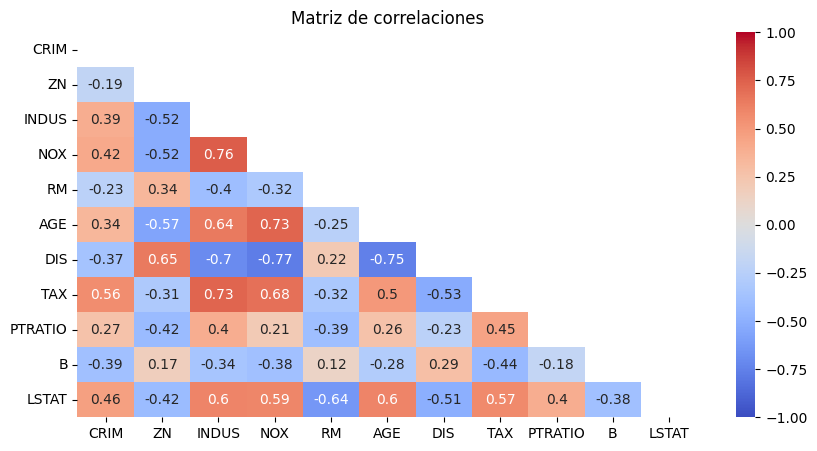

In [45]:
matriz_cor=data.corr('pearson')  #correlación de pearson

#como cor(x,x)=1 y cor(x,y)=cor(y,x) se puede disponer solo de la diagonal inferior. 
#La siguiente función elimina la parte superior de la matriz de correlaciones
mask = np.zeros(matriz_cor.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

plt.figure(figsize=(10,5))

sns.heatmap(matriz_cor, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm', mask=mask) 
#cmap para elegir la gama de colores y vmin y vmax identificar todo el espectro de valores de la correlación de pearson [-1,1]
plt.title('Matriz de correlaciones')
plt.show()

`Análisis utilidad técnicas de reducción de la dimensión`

Se emplean tanto el `test de Barlett` como el `índice KMO`

In [46]:
# Test de Barlett
barlett, pvalue = calculate_bartlett_sphericity(data_esc)
print(f'Barlett_Test: {round(barlett, 3)}')
print(f'p-value: {round(pvalue, 3)}')

Barlett_Test: 2695.501
p-value: 0.0


A la vista de los resultados, se rechaza la hipótesis nula de que la matriz no está correlacionada

In [47]:
# Índice KMO
kmo_total = calculate_kmo(data_esc)[1]
kmo_var = calculate_kmo(data_esc)[0]
print(f'KMO_Total: {round(kmo_total, 3)}') #KMO genreal
round(pd.DataFrame(calculate_kmo(data_esc)[0], columns=['KMO'], index=data_esc.columns),3) #KMO variable

KMO_Total: 0.854


,KMO
CRIM,0.888
ZN,0.823
INDUS,0.914
NOX,0.889
RM,0.706
AGE,0.887
DIS,0.878
TAX,0.831
PTRATIO,0.740
B,0.897


A la vista del valor del índice KMO (general) como por variable, se puede llevar a cabo la reducción de la dimensión

## Análisis de Componentes Principales

El PCA pretende hallar componentes linealmente independientes entre sí que sucesivamente recojan la mayor parte de la varianza total de las variables iniciales.

In [48]:
# definición y ajuste del modelo
pca = PCA(n_components=None) # None para n_componentes=n_variables del dataset -> se recoge toda la varianza
pca = pca.fit(data_esc) #ajuste del modelo

Los métodos empleados para escoger el número de componentes final son tanto `Scree plot` como `varianza explicada`.

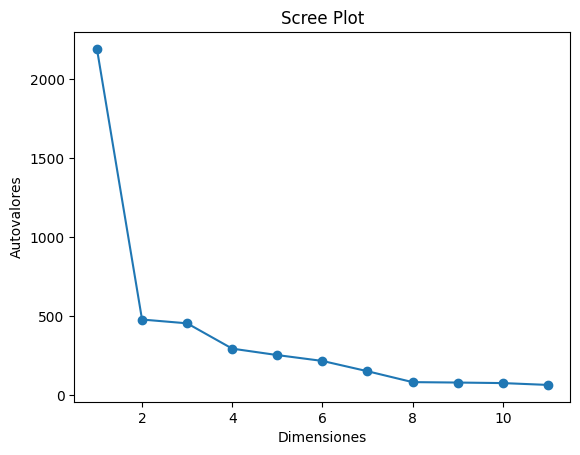

In [49]:
valores_singulares = pca.singular_values_  # raiz cuadrada de los autovalores

plt.scatter(range(1, data_esc.shape[1]+1), valores_singulares ** 2)
plt.plot(range(1, data_esc.shape[1]+1), valores_singulares ** 2)
plt.title('Scree Plot')
plt.xlabel('Dimensiones')
plt.ylabel('Autovalores')
plt.show()

El gráfico muestra el valor de los autovalores en función de la dimensión

- `Varianza explicada por cada componente`

In [50]:
suma = 0
for i, j in enumerate(pca.explained_variance_ratio_):
     suma = suma + j
     print(f"Componente_{i+1}: {round(suma,5)}")

Componente_1: 0.50601
Componente_2: 0.61626
Componente_3: 0.72097
Componente_4: 0.78865
Componente_5: 0.84691
Componente_6: 0.89661
Componente_7: 0.93126
Componente_8: 0.94997
Componente_9: 0.96807
Componente_10: 0.98538
Componente_11: 1.0


Finalmente, se eligen 5 dimensiones puesto que se recoge casi el 85% de la variabilidad de los datos.

Destacar que se desea obtener el máximo porcentaje de varianza expliada no comprender las nuevas dimensiones

In [51]:
pca = PCA(n_components=5) 
pca = pca.fit(data_esc)

A partir del ajuste del modelo podemos obtener:

`Cargas de las Componentes Principales sobre las variables antiguas`

In [52]:
componentes = ['Comp_1', 'Comp_2', 'Comp_3', 'Comp_4', 'Comp_5']
pd.DataFrame(np.transpose(pca.components_), columns=componentes, index=data_esc.columns)

,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5
CRIM,0.245010,-0.212788,0.456859,-0.048479,0.382543
ZN,-0.280553,-0.172885,0.452319,0.285961,0.290581
INDUS,0.365460,0.075708,-0.020166,-0.015595,0.160873
NOX,0.363386,0.267888,0.072140,0.157097,0.071108
RM,-0.220047,0.516420,0.349525,-0.500067,0.093616
AGE,0.338192,0.321033,-0.096567,0.071656,-0.017633
DIS,-0.342449,-0.399632,0.085470,0.029871,-0.019622
TAX,0.337141,-0.125952,0.275828,-0.141587,0.326286
PTRATIO,0.214447,-0.472427,-0.261864,-0.671389,0.037996
B,-0.206446,0.105978,-0.543924,0.110398,0.781564


`Coordenadas antiguas en las nuevas dimensiones`

In [53]:
x_new = pd.DataFrame(pca.fit_transform(data_esc), columns=componentes)
print(f'Coord. old - Componentes Principales: {x_new.shape}')

Coord. old - Componentes Principales: (394, 5)


`Coordenadas nuevas en las antiguas variables`

In [54]:
x_old = pd.DataFrame(pca.inverse_transform(x_new), columns=data_esc.columns)
print(f'Coord. new - Antiguas variables: {x_old.shape}')

Coord. new - Antiguas variables: (394, 11)


`Gráfico Biplot: interpretación de las instancias y las variables`

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


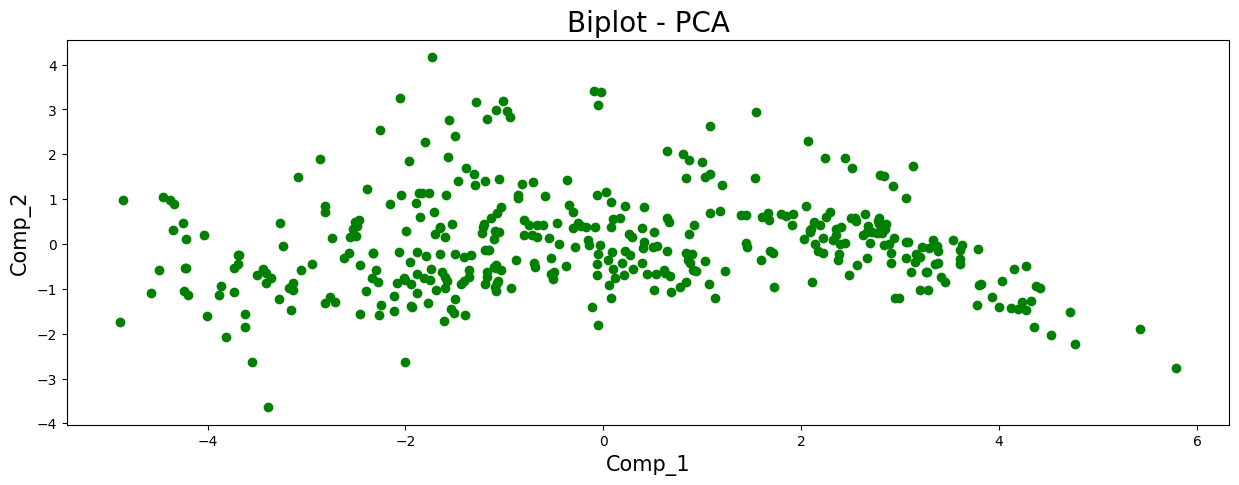

In [55]:
# componentes a graficar en el Scatterplot: para elegir otra componente, cambiar del elemento de la lista
comp_x = x_new.columns[0] #pc1
comp_y = x_new.columns[1] #pc2

# Parámetros necesarios para pintar las variables antiguas en el biplot
n = x_old.shape[1] #número de variables antiguas (para recorrer el bucle)
lista = x_old.columns  #nombre d elas variables
factor = 3.5 #factor para mejor visualización de los autovalores (a elegir por usuario)

#Gráfico Biplot
plt.figure(figsize=(15,5))
plt.scatter(x_new[comp_x], x_new[comp_y], color='green') #coordenadas de los individuos
for i in range(n):  #coordenadas de las variables
    plt.arrow(0, 0, x_old.iloc[0,i]*factor, x_old.iloc[1,i]*factor,color='orange', width=0.05)
    plt.text(x_old.iloc[0,i]*factor, x_old.iloc[1,i]*factor, lista[i], fontsize=15)

plt.title('Biplot - PCA', fontsize=20), plt.xlabel(comp_x, fontsize=15), plt.ylabel(comp_y, fontsize=15)
plt.show()

`variables explicativas en un modelo predictivo`: uso de las nuevas variables/dimensiones como predictores pues las Componentes Principales se emplean para evitar multicolinealidad entre variables

In [62]:
x_new.corr() #Matriz de correlación de Pearson

,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5
Comp_1,1.000000e+00,1.762390e-17,-9.751780e-18,-7.241486e-17,-1.344460e-16
Comp_2,1.762390e-17,1.000000e+00,1.606956e-16,-2.058116e-16,3.017348e-17
Comp_3,-9.751780e-18,1.606956e-16,1.000000e+00,1.856297e-16,-4.193844e-16
Comp_4,-7.241486e-17,-2.058116e-16,1.856297e-16,1.000000e+00,2.496158e-16
Comp_5,-1.344460e-16,3.017348e-17,-4.193844e-16,2.496158e-16,1.000000e+00


## Caso 1: predicción del precio de la vivienda

Haciendo uso de estas nuevas variables (+ las variables que fueron excluídas previamente) se modeliza una `regresión lineal` para obtener el precio de la vivienda.

Obtenemos las variables categóricas y las convertimos a variables dummy:

In [73]:
data_cat['CHAS'] = data_cat['CHAS'].astype('category') 
data_cat['RAD'] = data_cat['RAD'].astype('category')

# se aplica reset_index porque el concat se hace por índice y ese dataframe tiene los índices iniciales
datos_entrada = pd.concat([x_new, data_cat.reset_index(drop=True)], axis=1)
datos_entrada = pd.get_dummies(datos_entrada, drop_first=True, dtype=int)

Finalmente se hace la modelización y se evalúa el desempeño del modelo con el `coeficiente de determinación`

In [76]:
#definición y ajuste del modelo
reg = LinearRegression(fit_intercept=True) #definición del modelo
reg.fit(datos_entrada, y)

In [78]:
r2 = reg.score(datos_entrada, y) #r-square
n = len(datos_entrada) #número de registros
p = len(datos_entrada.columns) #número de varias independientes
r2_adj = 1-(1-r2)*(n-1)/(n-p-1)

print(f'R2: {round(r2,3)}')
print(f'R2-ajustado: {round(r2_adj,3)}')

R2: 0.745
R2-ajustado: 0.736


Una vez se tienen los resultados obtenemos el peso de las variables en el modelo

In [81]:
estimadores = pd.DataFrame(reg.coef_.T, columns=['Coeficientes'], index=datos_entrada.columns) #variables dependientes
intercepto = pd.DataFrame(reg.intercept_.T, columns=['Coeficientes'], index=['INTERCEPTO']) #intercepto
coef_modelo = pd.concat([intercepto, estimadores], axis=0) #unión por fila

coef_modelo

,Coeficientes
INTERCEPTO,18.474355
Comp_1,-2.911047
Comp_2,4.145958
Comp_3,0.815758
Comp_4,-1.194967
Comp_5,0.828317
CHAS_1.0,2.955627
RAD_2,2.580235
RAD_3,4.724084
RAD_4,3.078340


## Caso 2: Análisis Factorial 

El AF se diferencia al PCA en que se desea encontrar factores/dimensiones que expliquen la mayor parte de la varianza común

Se aplica el modelo teniendo en cuenta:
- `Método de extracción de factores`: máxima verosimilitud
- `Rotación`: varimax 

In [83]:
n = 4
fa = FactorAnalyzer(n_factors=n, rotation='varimax', method='principal').fit(data_esc) # definición y ajuste del modelo

Al igual que en el caso anterior, se estudia la `variable explicada` así como el gráfico `scree-plot`

- `Scree-plot`

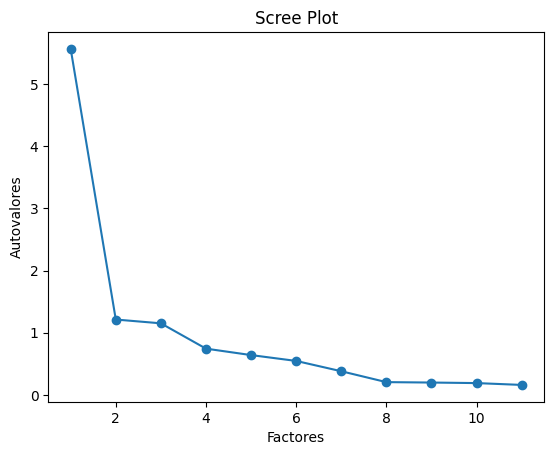

In [84]:
autovalores = fa.get_eigenvalues()[0]

plt.scatter(range(1, data_esc.shape[1]+1), autovalores)
plt.plot(range(1, data_esc.shape[1]+1),autovalores)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Autovalores')
plt.show()

In [ ]:
- `Varianza Explicada`

In [85]:
var_exp = fa.get_factor_variance()
tabla = pd.DataFrame(
    np.transpose(var_exp), # matriz traspuesta para la visualización correcta
    columns=['D.E - Cargas', 'Varianza por Factor', 'Variaza Acumulada'], 
    index=['Factor_1', 'Factor_2', 'Factor_3', 'Factor_4']
)
tabla

,D.E - Cargas,Varianza por Factor,Variaza Acumulada
Factor_1,3.585566,0.325961,0.325961
Factor_2,1.635994,0.148727,0.474687
Factor_3,2.232692,0.202972,0.677659
Factor_4,1.220851,0.110986,0.788646


`Interpretación de las cargas`

In [86]:
cargas = pd.DataFrame(fa.loadings_, columns=tabla.index, index=data_esc.columns)
cargas

,Factor_1,Factor_2,Factor_3,Factor_4
CRIM,0.157193,0.169403,0.754063,0.095774
ZN,-0.727658,-0.138651,0.095190,-0.461633
INDUS,0.694518,0.275207,0.389267,0.203464
NOX,0.799748,0.212335,0.399629,-0.044923
RM,-0.125950,-0.926980,-0.046165,-0.206228
AGE,0.837178,0.167382,0.213756,0.039952
DIS,-0.894948,-0.060613,-0.215822,-0.065782
TAX,0.425607,0.207320,0.685610,0.245513
PTRATIO,0.113737,0.217184,0.210223,0.914818
B,-0.139602,-0.001595,-0.761979,-0.023895


De la tabla de cargas se obtiene la siguiente conclusión:
- Factor 1:  zn (-), indus(+), nox(+), age(+), dis(-)
- Factor 2: rm (-), lstat(+)
- Factor 3: crim(+), tax(+)
- Factor 4: ptratio(+)

Importante: Para la lectura del factor, se interpreta que una carga inferior al 45% no es importante en éste

`Unicidad y Comunalidad`

- `Unicidad/Especificidad`

In [87]:
pd.DataFrame(fa.get_uniquenesses(), columns=['Unicidad'], index=data_esc.columns)

,Unicidad
CRIM,0.368809
ZN,0.229124
INDUS,0.248979
NOX,0.153596
RM,0.080183
AGE,0.223827
DIS,0.144487
TAX,0.245540
PTRATIO,0.058808
B,0.399326


Valores muy bajos de unicidad para las variables "RM", "PTRATIO" y "DIS" -> factores únicos 

- `Comunalidad`

In [88]:
pd.DataFrame(fa.get_communalities(), columns=['Comunalidad'], index=data_esc.columns) # comunalidad=1-unicidad

,Comunalidad
CRIM,0.631191
ZN,0.770876
INDUS,0.751021
NOX,0.846404
RM,0.919817
AGE,0.776173
DIS,0.855513
TAX,0.754460
PTRATIO,0.941192
B,0.600674
